# Compte Rendu : Régression Paramétrique
**Nom :** MALLARD  
**Prénom:** Diégo  
**Classe :** ICM1A  
**Date :** 27 Avril 2025  
**Cours :** MIAM (UP1)    
**TP 2 : Régression Paramétrique**    

---

# Table des Matières
0. [Présentation des 2 autres TPs](#0-Présentation6des-2-autres-TPs)  
1. [Introduction](#1-Introduction)  
2. [Implémentation de la régression](#2-Implémentation-de-la-Régression)  
3. [Ordre Polynomial et validation croisée](#3-Ordre-Polynomial-et-Validation-Croisée)  
4. [Normalisation](#4-Normalisation)  
5. [Régularisation](#5-Régularisation)  
6. [Conclusion](#8-Conclusion)  

---
# 0. Présentation des 2 autres TPs.
Le premier TP porte sur le partitionnement des données et nous permet de constater l'importance de la préparation du jeu de données.
On parle ici de microstructures représentées par des vecteurs.
On commence par les regrouper en clusters grâce à l'algorithme des K-moyennes.
On va tester cela sur des données non renumérotées. On évalue sa qualité grâce à une matrice de confusion.
Ensuite, on teste la même chose mais avec des données renumérotées, ce qui améliore la qualité du partitionnement.
On analyse ensuite d'autres critères de qualité, comme la norme de Frobenus de la matrice gradient de déplacement.

Le troisième et dernier TP aborde le sujet des réseaux de neurones. Le but de ce TP est de construire un RDN (réseau de neurones) capable de prédire une caractéristique d'un matériau, ici, sa conductivité.
On dispose de quatre paramètres, les mêmes que dans le deuxième TP que je vais présenter en détail un peu plus loin. 
L'énoncé nous amène à comparer un RDN créé de nous-même à un modèle créé sur TensorFlow.
On passe une première partie du TP à normaliser et séparer les données (pour entrainer notre modèle).
On effectue ensuite la classique propagation directe et rétropropagation, dans le but d'optimiser les poids du RDN.
On tente ensuite de perfectionner le modèle en modifiant des hyper-paramètres comme le nombre de couches, les fonctions d'activations,etc.

    

---
# 1. Introduction

Dans ce TP, nous nous intéressons à un matériau homogénéisé et cherchons à modéliser sa perméabilité  $k$ en fonction de différents paramètres microstructuraux : $V_f, R_{\text{min}}, R_{\text{max}}$ et $E$. L'idée est de comprendre comment ces caractéristiques influencent les propriétés physiques globales du matériau. 

Le travail consiste à utiliser des modèles de régression paramétrique pour établir ces relations. En cours de route, on évalue la précision des modèles grâce aux résidus, on optimise leur complexité avec la validation croisée, et on explore comment des techniques comme la normalisation ou la régularisation peuvent améliorer leur fiabilité.   
J'ai choisi ce TP car c'est celui où j'ai pris le plus de plaisir à faire (et celui que j'ai le plus maîtrisé sur la même base de temps que les deux autres TP).

---
# 2.Implémentation de la Regression

- [ ] Importer les données $V_f, R_{\text{min}}, R_{\text{max}}$ ,$E$ et $k$ et tracer les graphes montrant la distribution de $k$ par rapport à 
chaque paramètre.
- [ ] Identifier les facteurs de confusion dans les relations observées.
- [ ] Implémenter une fonction pour générer une matrice de polynômes à partir des données d'entrée.
- [ ] Effectuer une régression polynomiale par moindres carrés et tester le modèle avec une régression affine (ordre 1).
- [ ] Observer et commenter l'influence physique des paramètres microstructaux.
- [ ] Tracer les écarts (\(f(x)\) vs \(y\)) pour vérifier que les valeurs prédites sont proches des valeurs réelles.
- [ ] Évaluer l'évolution du résidu en fonction de l'ordre polynomial et interpréter les résultats.
- [ ] Étudier le conditionnement de la matrice en fonction de l'ordre polynomial et identifier l'ordre maximal ur gestion dans le cadre de ce TP.
---

- [ ] Importer les donné$V_f, R_{\text{min}}, R_{\text{max}}$ ,$E$ et $k$ et tracer les graphes montrant la distribution de $k$ par rapport à 
chaque paramètre.
- [ ] Identifier les facteurs de confusion dans les relations observées.

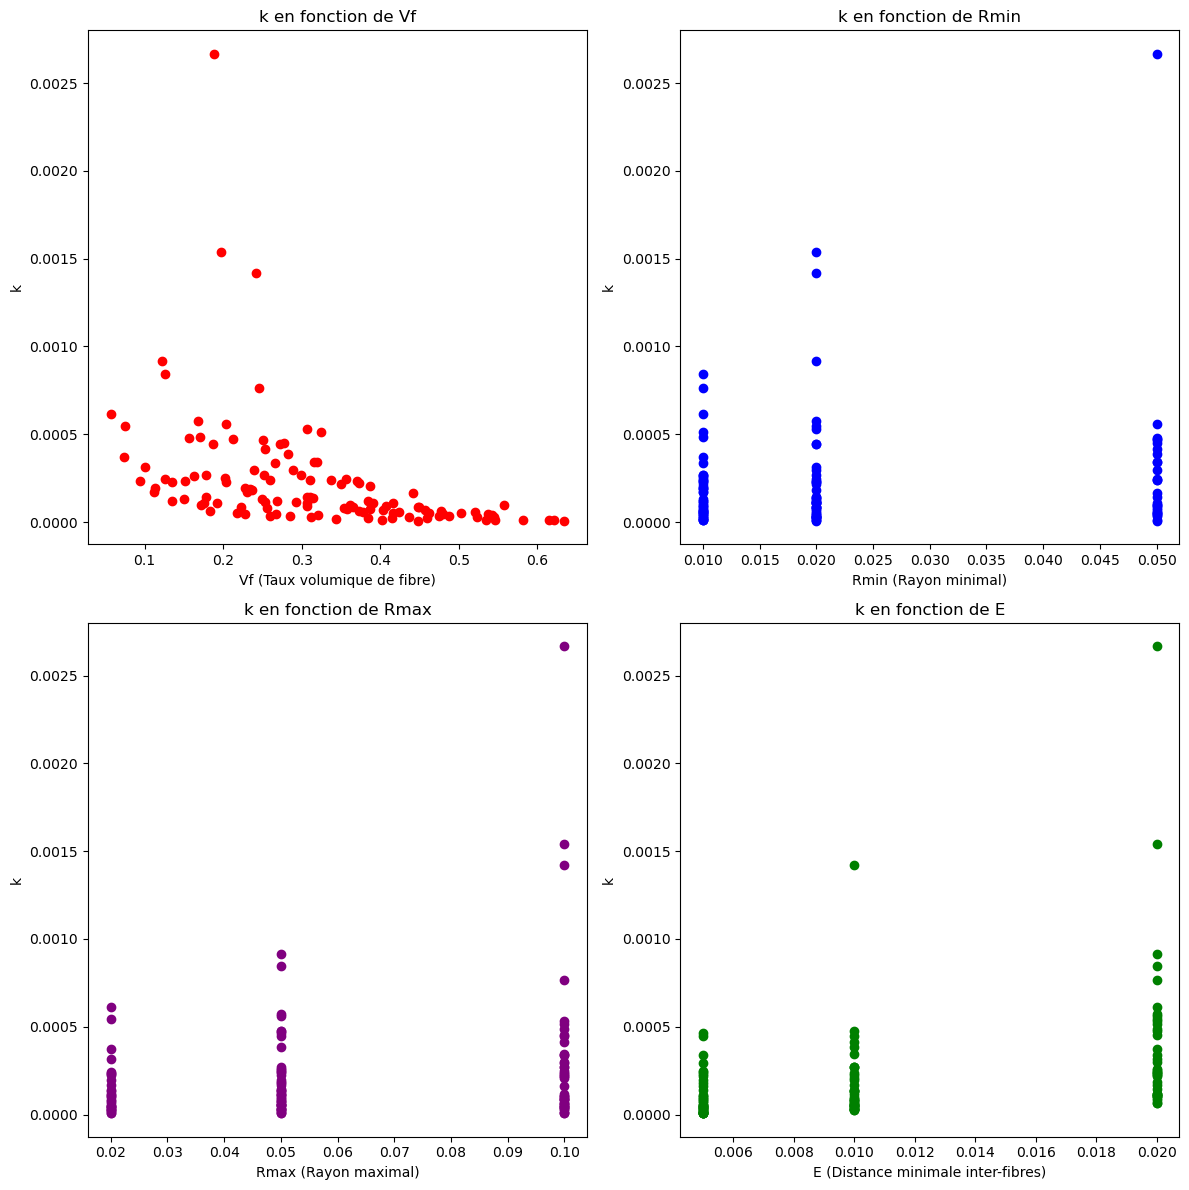

In [106]:
import regression_ressources as rr
import matplotlib.pyplot as plt
import numpy as np
"""Implémentation de la régression"""
# Importation des données avec la fonction readData
# X correspond aux paramètres d'entrée (4 colonnes : Vf, Rmin, Rmax, E)
# k correspond à la perméabilité (paramètre de sortie)
X, k = rr.readData('C:/Users/monsi/Miam/TP2 Regression/hypercube/') #Importation des données 

# Séparation les colonnes de la matrice X pour faciliter l'accès aux paramètres
Vf = X[:, 0]  # Volume fraction (taux volumique de fibre)
Rmin = X[:, 1]  # Rayon minimal des fibres
Rmax = X[:, 2]  # Rayon maximal des fibres
E = X[:, 3]  # Distance minimale entre les fibres
 
# Création une fonction pour tracer un graphe de manière générique (factorisation du code)
def tracer_distribution(x_values, y_values, x_label, title, color):
    plt.scatter(x_values, y_values, color=color)
    plt.xlabel(x_label)
    plt.ylabel('k')
    plt.title(title)

# Configuration globale pour afficher plusieurs graphiques
plt.figure(figsize=(12, 12))

# Graphe pour Vf
plt.subplot(2, 2, 1)
tracer_distribution(Vf, k, 'Vf (Taux volumique de fibre)', 'k en fonction de Vf', 'red')

# Graphe pour Rmin
plt.subplot(2, 2, 2)
tracer_distribution(Rmin, k, 'Rmin (Rayon minimal)', 'k en fonction de Rmin', 'blue')

# Graphe pour Rmax
plt.subplot(2, 2, 3)
tracer_distribution(Rmax, k, 'Rmax (Rayon maximal)', 'k en fonction de Rmax', 'purple')

# Graphe pour E
plt.subplot(2, 2, 4)
tracer_distribution(E, k, 'E (Distance minimale inter-fibres)', 'k en fonction de E', 'green')

# Ajustement de la présentation des graphiques en groupe de 4.
plt.tight_layout()
plt.show()

Rappelons que $k$ représente la perméabilité du milieu poreux. C'est un scalaire qui caractérise la capacité d'un fluide à se déplacer à travers un matériau.  
Lorsque $Vf$ augmente; ce qui veut dire que le milieu est plus dense en fibre; on observe une diminution de $k$, ce qui est physiquement logique.  
Les valeurs plus grandes de $Rmin$ semblent correspondre à un $k$ plus élevé a priori. (Point anomalie en haut à droite ?)   
Même remarque pour $Rmax$ mais cette fois c'est beaucoup plus explicite.   
Lorsque $E$ augmente, $k$ semble augmenter aussi.  
Ces graphes ne suffisent pas à confirmer des relations précises en raison des interactions possibles entre les paramètres.   

- [ ] Implémenter une fonction pour générer une matrice de polynômes à partir des données d'entrée.
- [ ] Effectuer une régression polynomiale par moindres carrés et tester le modèle avec une régression affine (ordre 1).
- [ ] Observer et commenter l'influence physique des paramètres microstructaux.

Coefficients du modèle affine : [[ 0.00034702]
 [-0.00173025]
 [ 0.00344679]
 [ 0.00530064]
 [ 0.00172079]]


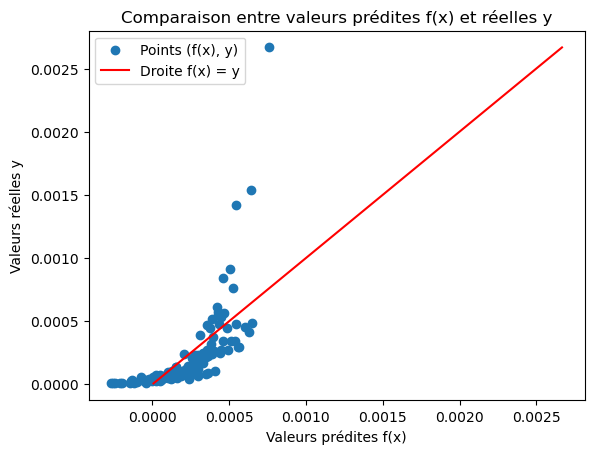

In [110]:
def construire_H(X, indices):
    #X : Matrice des données d'entrée (NxD), avec N points et D dimensions.
    #indices : Matrice des puissances des monômes, générée par polyPowers.
    #Renvoie H la matrice des monômes (NxS), où chaque colonne correspond à un monôme évalué.
    
    # Dimensions de X et indices
    N, D = X.shape
    S = indices.shape[0]
    H = np.ones((N, S))   # Initialisation de la matrice H avec des 1
    for s in range(S):    # Calcul des monômes
        for d in range(D):
            H[:, s] *= X[:, d] ** indices[s, d]
    return H

#On implémente ensuite la méthode de régression polynomiale
def regression_polynomiale(X, y, ordermax):
    #X : Matrice des données d'entrée (NxD)
    #y : Vecteur des données de sortie (Nx1)
    #ordermax : Ordre maximal des polynômes
    #Renvoie a, qui stocke les coefficients du modèle
    
    dimension = X.shape[1] #Génération des puissances
    indices = rr.polyPowers(ordermax, dimension)
    H = construire_H(X, indices)
    A = np.dot(H.T, H)
    b = np.dot(H.T, y)
    a = np.linalg.solve(A, b)
    
    return a

# Générer les prédictions
X, y = rr.readData('C:/Users/monsi/Miam/TP2 Regression/hypercube/')

# Effectuer une régression affine
ordermax = 1
coefficients = regression_polynomiale(X, y, ordermax)

# Afficher les coefficients obtenus
print("Coefficients du modèle affine :", coefficients)

indices = rr.polyPowers(ordermax, X.shape[1])
H = construire_H(X, indices)
y_pred = np.dot(H, coefficients)

# Tracé des écarts
plt.scatter(y_pred, y, label='Points (f(x), y)')
plt.plot([min(y), max(y)], [min(y), max(y)], color='red', label='Droite f(x) = y')
plt.xlabel("Valeurs prédites f(x)")
plt.ylabel("Valeurs réelles y")
plt.title("Comparaison entre valeurs prédites f(x) et réelles y")
plt.legend()
plt.show()

Les coefficients du modèle affine suggère que, sans normalisation, celui qui prend le plus de place dans la régression d'ordre 1 est le coefficient associé à Rmax.
On observe un écart notable à partir d'un moment. Cela peut s'expliquer par une non-linéarité qui sort donc du champ d'action de la méthode de régréssion linéaire. On peut aussi se douter d'une certaine corrélation entre les différents facteurs Vf, Rmin, Rmax et E. A l'oeil, on voit que les donnéees ne peuvent pas être collées à un modèle affine.

- [ ] Tracer les écarts (\(f(x)\) vs \(y\)) pour vérifier que les valeurs prédites sont proches des valeurs réelles.
- [ ] Évaluer l'évolution du résidu en fonction de l'ordre polynomial et interpréter les résultats.

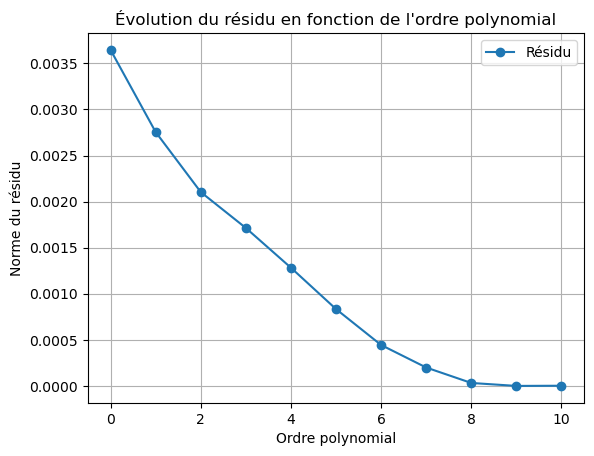

In [114]:
def tracer_residus(X, y, ordremax):
    #Trace l'évolution du résidu en fonction de l'ordre polynomial.
    #X : Matrice des données d'entrée (NxD).
    #y : Vecteur des données de sortie (Nx1).
    #ordremax : Ordre polynomial maximal à tester.
    
    residus = []  # Liste pour stocker les résidus
    for ordre in range(ordremax + 1):  # Tester tous les ordres de 0 à max_order
        indices = rr.polyPowers(ordre, X.shape[1]) # Générer les indices pour les monômes
        H = construire_H(X, indices)
        a=regression_polynomiale(X, y, ordre)
        # Calculer le résidu : r = Ha - y
        r = np.dot(H, a) - y
        residus.append(np.linalg.norm(r))  # Norme du résidu
        
    # Tracer l'évolution du résidu
    plt.plot(range(ordremax + 1), residus, marker='o', label='Résidu')
    plt.xlabel("Ordre polynomial")
    plt.ylabel("Norme du résidu")
    plt.title("Évolution du résidu en fonction de l'ordre polynomial")
    plt.grid()
    plt.legend()
    plt.show()

tracer_residus(X, y, 10)

Il est clair que plus l'ordre augmente et plus le résidu devient négligeable, atteignant le zéro (précision de l'ordinateur) après l'ordre 8.


- [ ] Étudier le conditionnement de la matrice en fonction de l'ordre polynomial et identifier l'ordre maximal.

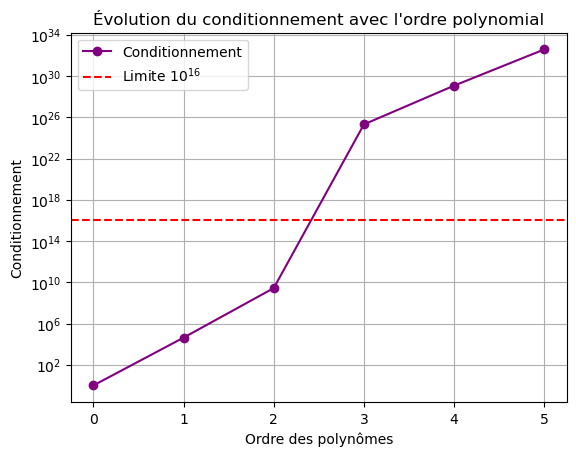

[1.0,
 43196.75008762225,
 2764774082.1231117,
 2.1103114363275226e+25,
 1.2120536512178777e+29,
 3.94529687018579e+32]

In [118]:
#Trace l'évolution du conditionnement de la matrice A = H^T H en fonction de l'ordre polynomial.
def evolution_conditionnement(X, ordremax):
    #X : Matrice des données d'entrée (NxD).
    #ordremax : Ordre polynomial maximal à tester.
    #Renvoie la liste des conditionnements pour chaque ordre.
    
    conditionnements = []  # Liste pour stocker les conditionnements

    for ordre in range(ordremax + 1): 
        indices = rr.polyPowers(ordre, X.shape[1])
        H = construire_H(X, indices)
        A = np.dot(H.T, H)
        conditionnements.append(np.linalg.cond(A))  # Ajouter le conditionnement à la liste

    # Tracer l'évolution du conditionnement
    plt.plot(range(ordremax + 1), conditionnements, marker='o', color='purple', label='Conditionnement')
    plt.title("Évolution du conditionnement avec l'ordre polynomial")
    plt.xlabel("Ordre des polynômes")
    plt.ylabel("Conditionnement")
    plt.axhline(y=10**16, color='red', linestyle='--', label='Limite $10^{16}$')  #Limite machine
    plt.yscale('log')
    plt.grid()
    plt.legend()
    plt.show()

    return conditionnements

evolution_conditionnement(X,5)

Cependant, on remarque que le conditionnement excède les capacités de la machine à partir de l'ordre entier 2... Ce qui pose un problème clair vis-à-vis de notre observation précédente. La limite est donc à 2... Bien loin de l'ordre 8 qui semblait pertinent.
Cette évolution pouvait sûrement se prévoir. En regardant les 20 premières lignes des données, Vf appartient à [0.0568,0.2724] (qui est une grande échelle). Cependant, Rmin appartient à l'ensemble {0.01 (pour les 9 premières lignes) ,[0.02,0.05] (pour le reste)} (ce qui est une très petite échelle). E a une une petite amplitude, ce qui indique une contribution plus faible par rapport à Rmax qui appartient à [0.02,0.1]. 

On remarque donc une forte correlation entre Rmin et Rmax, ainsi qu'une variation notable de Vf par rapport aux autres paramètres.    

Cette dernière observation peut laisser présager une difficulté pour le conditionnement.

---
## 3. Ordre polynomial et validation croisée
- [ ] Construire une fonction de prédiction des valeurs \(y\) basée sur les données d'entrée et l'ordre polynomial.
- [ ] Tester visuellement le modèle avec des ordres faibles et élevés. Comparer les résultats.
- [ ] Appliquer une validation croisée pour séparer les données en ensembles d'entraînement et de validation.
- [ ] Tracer le résidu de validation croisée en fonction de l'ordre polynomial pour identifier l'ordre optimal.
- [ ] Analyser les phénomènes de sur-ajustement et sous-ajustement.
---

- [ ] Construire une fonction de prédiction des valeurs \(y\) basée sur les données d'entrée et l'ordre polynomial.
- [ ] Tester visuellement le modèle avec des ordres faibles et élevés. Comparer les résultats.

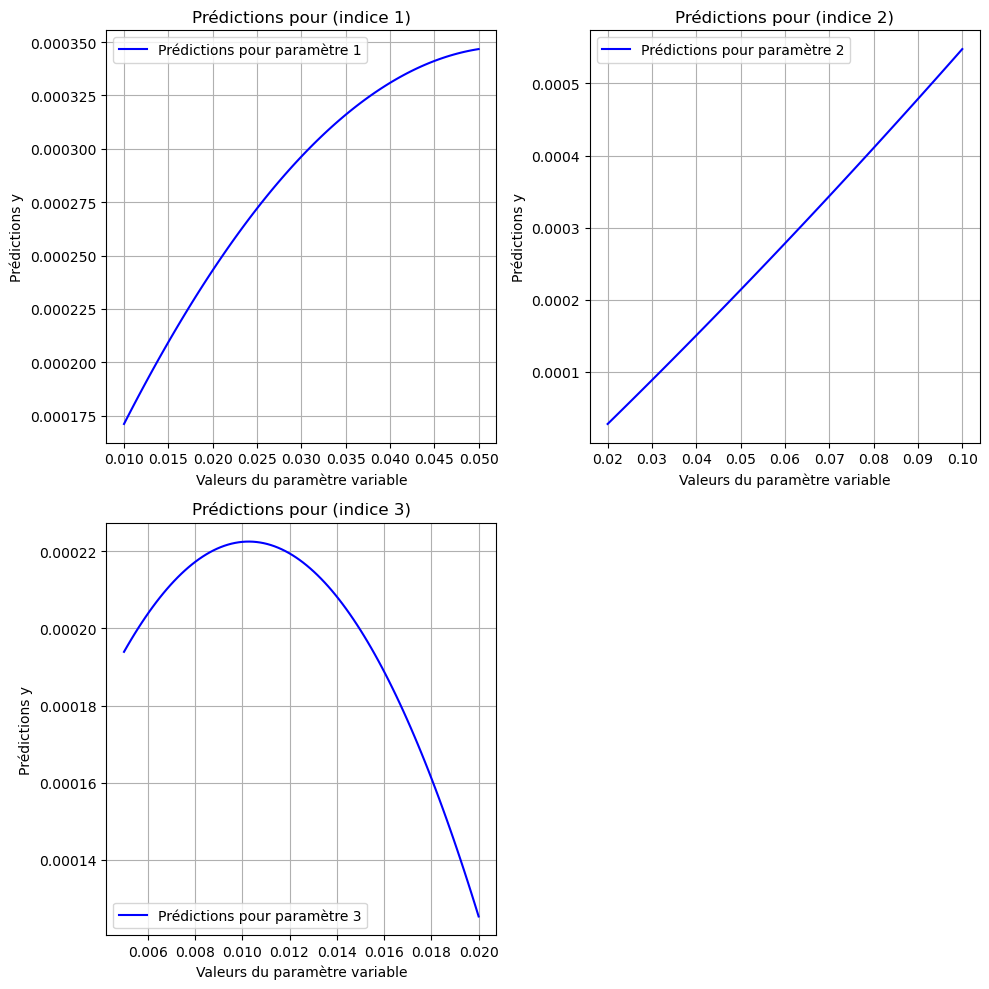

In [123]:
# Affiche les résultats du modèle pour un paramètre donné variable, sans modelPlotter
def afficher_resultats_parametre_variable(X, y, param_indices, ordremax, coefficients):
    # X : Matrice des données d'entrée (NxD).
    # y : Vecteur des données de sortie (Nx1).
    # param_indices : Liste des indices de paramètres variables (ex: [1,2,3]).
    # ordremax : Ordre maximal des polynômes.
    # coefficients : Vecteur des coefficients.
    # Affiche les graphiques dans une figure 2x2.

    plt.figure(figsize=(10, 10))  # Une seule grande figure

    for i, param_index in enumerate(param_indices):
        param_valeurs = np.linspace(np.min(X[:, param_index]), np.max(X[:, param_index]), 100)
        X_variable = np.copy(X)
        y_pred = []

        for valeur in param_valeurs:
            X_variable[:, param_index] = valeur  # Appliquer la même valeur à toute la colonne
            indices = rr.polyPowers(ordremax, X_variable.shape[1])  # Générer les indices pour H
            H = construire_H(X_variable, indices)  # Construire la matrice des monômes
            y_pred.append(np.dot(H, coefficients).mean())  # Moyenne des prédictions
        plt.subplot(2, 2, i+1)  # Grille 2x2
        plt.plot(param_valeurs, y_pred, color='blue', label=f'Prédictions pour paramètre {param_index}')
        plt.title(f"Prédictions pour (indice {param_index})")
        plt.xlabel("Valeurs du paramètre variable")
        plt.ylabel("Prédictions y")
        plt.grid()
        plt.legend()

    plt.tight_layout()
    plt.show()

# Charger les données
X, y = rr.readData('C:/Users/monsi/Miam/TP2 Regression/hypercube/') 

# Calculer les coefficients pour un ordre maximal donné
coefficients = regression_polynomiale(X, y, ordermax=2)

# Afficher les résultats pour les indices 1, 2, 3
afficher_resultats_parametre_variable(X, y, param_indices=[1, 2, 3], ordremax=2, coefficients=coefficients)

Ces graphes montrent des tendances entre les paramètres microstructuraux et la perméabilité 𝑘, mais ne suffisent pas pour conclure. Ils ne prennent pas en compte les interactions entre les variables et simplifient le problème. Les corrélations, effets combinés et non-linearités possibles ne sont pas visibles ici. Une analyse plus approfondie est nécessaire pour établir des relations justes.

- [ ] Appliquer une validation croisée pour séparer les données en ensembles d'entraînement et de validation.
- [ ] Tracer le résidu de validation croisée en fonction de l'ordre polynomial pour identifier l'ordre optimal.
- [ ] Analyser les phénomènes de sur-ajustement et sous-ajustement.

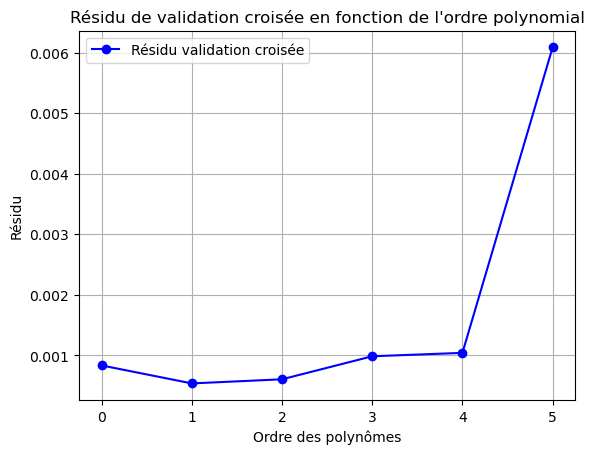

[0.0008330052719357705,
 0.0005361528794875672,
 0.0006044889200075634,
 0.000984660750704583,
 0.0010409453702979294,
 0.006085661291119776]

In [127]:

#Calcule et trace le résidu de validation croisée en fonction de l'ordre polynomial.
def validation_croisee_residu(X, y, ordremax, split_ratio=0.8):
    #X : Matrice des données d'entrée (NxD).
    #y : Vecteur des données de sortie (Nx1).
    #max_order : Ordre polynomial maximal à tester.
    #split_ratio : Proportion des données pour l'ensemble d'entraînement.
    #Renvoie la liste des résidus de validation croisée.

    # Séparation des données en ensembles d'entraînement et de validation
    Xv, Xd, yv, yd = rr.crossValSplit(X, y, 1 - split_ratio)

    residus = []  

    for ordre in range(ordremax + 1):
        # Construire le modèle sur l'ensemble d'entraînement
        indices = rr.polyPowers(ordre, Xd.shape[1])
        H_train = construire_H(Xd, indices)
        A = np.dot(H_train.T, H_train)
        b = np.dot(H_train.T, yd)
        coefficients = np.linalg.solve(A, b)

        # Calculer le résidu sur l'ensemble de validation
        H_val = construire_H(Xv, indices)
        y_pred_val = np.dot(H_val, coefficients)
        residu = np.linalg.norm(y_pred_val - yv)
        residus.append(residu)

    # Tracer l'évolution des résidus
    plt.plot(range(ordremax + 1), residus, marker='o', color='blue', label='Résidu validation croisée')
    plt.title("Résidu de validation croisée en fonction de l'ordre polynomial")
    plt.xlabel("Ordre des polynômes")
    plt.ylabel("Résidu")
    plt.grid()
    plt.legend()
    plt.show()

    return residus

validation_croisee_residu(X,y,5)

On divise l'ensemble des données en 2 sous-ensembles. Un pour l'entraînement du modèle et l'autre pour sa validation, en calculant la norme du résidu pour mesurer les performances sur cet ensemble. On le fait pour éviter le sur-ajustement, qui est induit par un modèle trop complexe. Ici, se traduisant par un ordre trop grand qui s'adapte trop aux données d'entraînement.  On évite aussi le risque de sous-échantillonage, qui est l'opposé du sur-ajustement. Ici, le modèle serait trop vague, et ne correspond en réalité pas du tout au jeu de données...

Lorsque j'avais réalisé mon TP, l'ordre optimal était l'ordre 2 mais en fait il varie, en fonction des jeux de données déterminés par CrossValSplit. Pour avoir un résultat constant, il faudrait fixer une seed dans la fonction. 

---
# 4. Normalisation

- [ ] Normaliser les données pour ramener les valeurs entre 0 et 1.
- [ ] Répéter la régression affine sur les données normalisées et analyser l'influence relative des paramètres.
- [ ] Étudier le conditionnement en fonction de l'ordre polynomial.
---

Revenons au cas de la régression affine: Coefficients du modèle affine : 
[[ 0.00034702],[-0.00173025],[ 0.00344679],[ 0.00530064],[0.00172079]]    
 Ainsi, en comparant les coefficients en valeur absolue, c'est le paramètre Rmax qui est a priori dominant ici.


Coefficients après normalisation : [[ 3.97703177e-04]
 [-9.99308226e-04]
 [ 1.37871769e-04]
 [ 4.24051458e-04]
 [ 2.58119102e-05]]


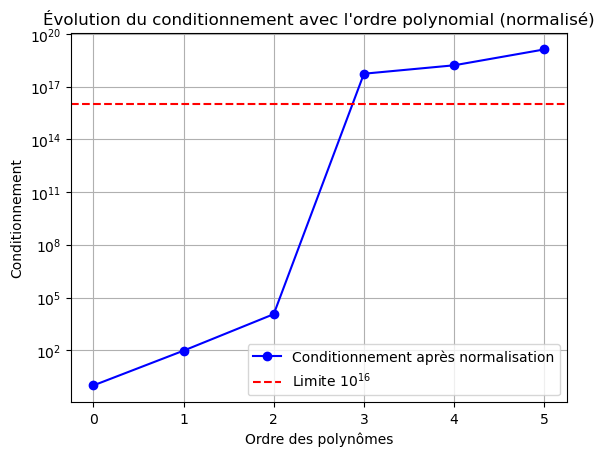

[1.0,
 95.18393356794783,
 11403.95446599777,
 5.510456983596892e+17,
 1.661661310190321e+18,
 1.3308781276769163e+19]

In [132]:

#Normalise les données entre 0 et 1 colonne par colonne.
def normaliser_donnees(X):
    #X : Matrice des données d'entrée (NxD).
    #Renvoie X_norm : Matrice normalisée (NxD).
    
    X_min = np.min(X, axis=0) 
    X_max = np.max(X, axis=0)  
    X_norm = (X - X_min) / (X_max - X_min)  
    return X_norm

X_norm = normaliser_donnees(X)

coefficients_norm = regression_polynomiale(X_norm, y, ordermax=1)

print("Coefficients après normalisation :", coefficients_norm)
# Coefficients après normalisation : [[ 3.97703177e-04]
#                                     [-9.99308226e-04]
#                                     [ 1.37871769e-04]
#                                     [ 4.24051458e-04]
#                                     [ 2.58119102e-05]]

# [0] : Biais, faible contribution fixe à y.
# [1] : Vf, influence négative forte sur y, paramètre dominant.
# [2] : Rmin, faible influence positive sur y.
# [3] : Rmax, influence positive notable sur y.
# [4] : Epsilon, influence très faible et presque négligeable.


#Trace le conditionnement de la matrice A = H^T H en fonction de l'ordre polynomial, après normalisation des données.
def tracer_conditionnement_normalise(X, ordremax):
    #X : Matrice des données d'entrée (NxD).
    #ordremax : Ordre polynomial maximal à tester.
    #Renvoie la liste des conditionnements pour chaque ordre.
    
    # Normaliser les données
    X_norm = normaliser_donnees(X)

    conditionnements = []  # Liste pour stocker les conditionnements

    for ordre in range(ordremax + 1): 
        indices = rr.polyPowers(ordre, X_norm.shape[1])
        H = construire_H(X_norm, indices)
        A = np.dot(H.T, H)
        cond = np.linalg.cond(A)
        conditionnements.append(cond)

    plt.plot(range(ordremax + 1), conditionnements, marker='o', color='blue', label='Conditionnement après normalisation')
    plt.title("Évolution du conditionnement avec l'ordre polynomial (normalisé)")
    plt.xlabel("Ordre des polynômes")
    plt.ylabel("Conditionnement")
    plt.axhline(y=10**16, color='red', linestyle='--', label='Limite $10^{16}$')  #Limite machine
    plt.yscale('log')  # Échelle logarithmique pour mieux visualiser
    plt.grid()
    plt.legend()
    plt.show()

    return conditionnements

tracer_conditionnement_normalise(X,5)

Les coefficients après normalisation sont un peu plus facile à 'interpréter'. On a toujours Rmax comme paramètre dominant.  
On remarque une nette augmentation de l'ordre maximal avant le dépassement de la limite machine, se rapprochant de 3.     
La normalisation permet à A d'être mieux conditionnée. 

---
# 5. Régularisation

- [ ] Implémenter une méthode de régularisation (Tikhonov) pour améliorer la stabilité des modèles polynomiaux.
- [ ] Étudier l'évolution du conditionnement avec la régularisation.
- [ ] Trouver un paramètre de régularisation optimal $\mu$ via validation croisée.
- [ ] Tracer la courbe en L pour déterminer la meilleure valeur de $\mu$.
- [ ] Comparer les résultats avec et sans régularisation.
---

- [ ] Implémenter une méthode de régularisation (Tikhonov) pour améliorer la stabilité des modèles polynomiaux.
- [ ] Étudier l'évolution du conditionnement avec la régularisation.

$$
A_\mu = H^T H + \mu I_S
$$
Avantage de la régularisation par rapport à la limitation de l'ordre polynomial :
- La régularisation permet d'utiliser des ordres polynomiaux élevés sans rendre le modèle instable,
- Elle réduit les effets des petites valeurs propres, stabilisant ainsi l'inversion de la matrice.

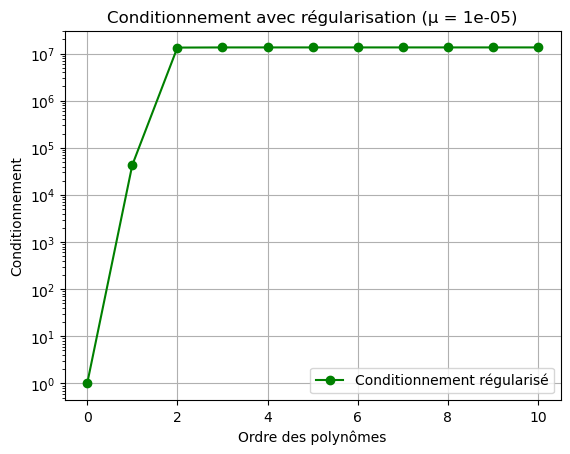

In [138]:

x,y=rr.readData('C:/Users/monsi/Miam/TP2 Regression/hypercube_old/')
#Trace le conditionnement de la matrice A_mu = H^T H + mu * I en fonction de l'ordre polynomial.
def tracer_conditionnement_regularisation(X, ordremax, mu):
    #X : Matrice des données normalisées (NxD).
    #ordremax : Ordre polynomial maximal à tester.
    #mu : Paramètre de régularisation.

    #Renvoie la liste des conditionnements pour chaque ordre.
    
    conditionnements = []  # Liste pour stocker les conditionnements

    for ordre in range(ordremax + 1): 
        indices = rr.polyPowers(ordre, X.shape[1])
        H = construire_H(X, indices)
        A = np.dot(H.T, H)
        A_mu = A + mu * np.eye(A.shape[0])
        cond = np.linalg.cond(A_mu)
        conditionnements.append(cond) 

    # Tracer le conditionnement
    plt.plot(range(ordremax + 1), conditionnements, marker='o', color='green', label='Conditionnement régularisé')
    plt.title(f"Conditionnement avec régularisation (µ = {mu})")
    plt.xlabel("Ordre des polynômes")
    plt.ylabel("Conditionnement")
    plt.yscale('log')
    plt.grid()
    plt.legend()
    plt.show()

    return conditionnements

#Trouve la meilleure valeur de µ par validation croisée.
def validation_croisee_regularisation(X, y, ordremax, mu_values, split_ratio=0.8):
    #X : Matrice des données normalisées (NxD).
    #y : Vecteur des données de sortie (Nx1).
    #ordremax : Ordre polynomial utilisé.
    #mu_values : Liste de valeurs de µ à tester.
    #split_ratio : Proportion des données pour l'ensemble d'entraînement.
    #Renvoie meilleure_mu : Valeur de µ qui minimise le résidu de validation croisée.
    
    Xv, Xd, yv, yd = rr.crossValSplit(X, y, 1 - split_ratio,setSeed=True)

    residus_mu = []  # Liste des résidus pour chaque µ

    for mu in mu_values:
        # Construire le modèle régularisé
        indices = rr.polyPowers(ordremax, Xd.shape[1])
        H_train = construire_H(Xd, indices)
        A = np.dot(H_train.T, H_train)
        A_mu = A + mu * np.eye(A.shape[0])
        b = np.dot(H_train.T, yd)
        coefficients = np.linalg.solve(A_mu, b)
        H_val = construire_H(Xv, indices)
        y_pred_val = np.dot(H_val, coefficients)
        residu = np.linalg.norm(y_pred_val - yv)
        residus_mu.append(residu)
        
    meilleure_mu = mu_values[np.argmin(residus_mu)]
    plt.figure(figsize=(8, 8))
    plt.plot(mu_values, residus_mu, marker='o', color='blue', label='Résidus validation croisée')
    plt.title("Résidu validation croisée pour différentes valeurs de µ")
    plt.xlabel("Valeurs de µ")
    plt.ylabel("Résidu")
    plt.xscale('log')
    plt.grid()
    plt.legend()
    plt.show()

    return meilleure_mu

ordre_max = 10  
mu = 1e-5       

conditionnements = tracer_conditionnement_regularisation(X, ordre_max, mu)

Le conditionnement ne dépasse a priori pas la valeur limite machine (du moins avant l'ordre 10, ce qui est déjà très grand)

- [ ] Trouver un paramètre de régularisation optimal $\mu$ via validation croisée.
- [ ] Tracer la courbe en L pour déterminer la meilleure valeur de $\mu$.
- [ ] Comparer les résultats avec et sans régularisation.

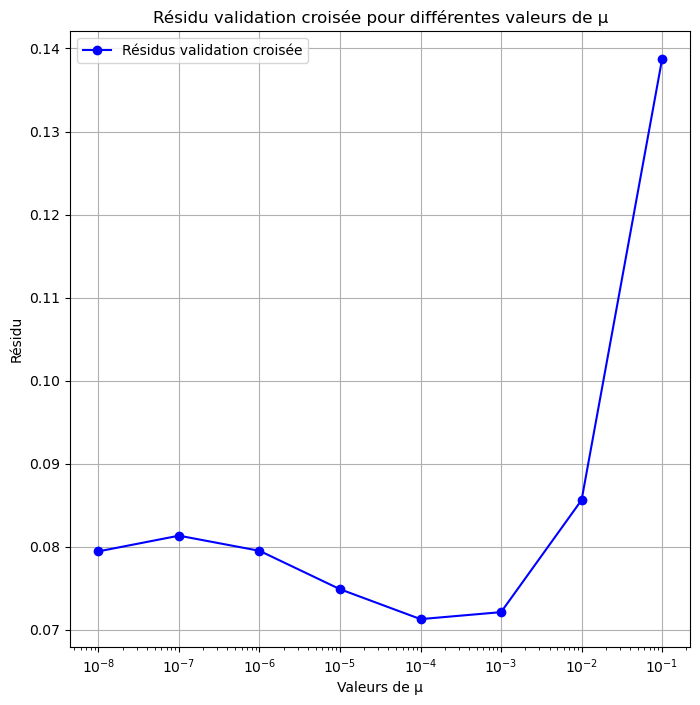

Meilleure valeur de µ : 0.0001


In [142]:
#Valeurs de mu à tester
mu_values = [1e-8, 1e-7, 1e-6, 1e-5, 1e-4, 1e-3,1e-2,1e-1]

meilleur_mu = validation_croisee_regularisation(X, y, ordremax=5, mu_values=mu_values)
print("Meilleure valeur de µ :", meilleur_mu)

#Trace la courbe en L pour déterminer la meilleure valeur de µ.
def courbe_en_L(X, y, ordremax, valeurs_mu):
    #X : Matrice des données normalisées.
    #y : Vecteur des données de sortie.
    #ordremax : Ordre polynomial utilisé.
    #valeurs_mu : Liste de valeurs de µ à tester.
    #Affiche la courbe en L.

    normes_a = [] 
    residus_r = []  

    for mu in valeurs_mu:
        indices = rr.polyPowers(ordremax, X.shape[1])
        H = construire_H(X, indices)
        A = np.dot(H.T, H)
        A_mu = A + mu * np.eye(A.shape[0])
        b = np.dot(H.T, y)
        coefficients = np.linalg.solve(A_mu, b)

        # Calculer les résidus et les normes des coefficients
        r_mu = np.dot(H, coefficients) - y
        residus_r.append(np.linalg.norm(r_mu))
        normes_a.append(np.linalg.norm(coefficients))

    plt.figure(figsize=(8, 8))
    plt.plot(residus_r,normes_a, marker='o', color='red', label='Courbe en L')
    plt.title("Courbe en L pour déterminer µ optimal")
    plt.ylabel("Norme des coefficients $\\|a_\\mu\\|$")
    plt.xlabel("Norme des résidus $\\|r_\\mu\\|$")
    plt.xscale('log')
    plt.yscale('log')
#    plt.axvline(x=10**(-5), color="green", label="meilleur mu précédent")  Ce n'est pas comparable. Faut un moyen de trouver mu ici...
    plt.grid()
    plt.legend()
    plt.show()


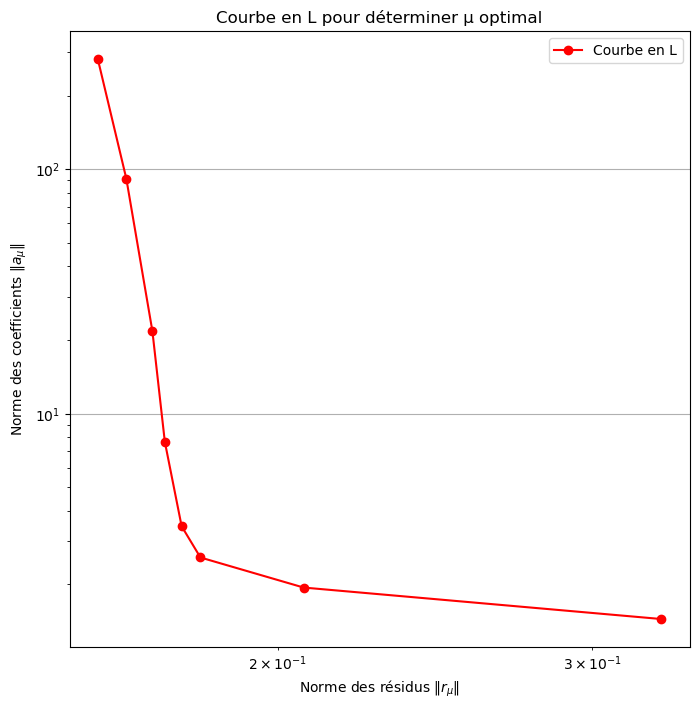

In [143]:
courbe_en_L(X, y, ordremax=5, valeurs_mu=mu_values)

J'ai tracé la courbe en L MAIS je n'arrive pas à l'interpréter...  Peut-être trouver l'endroit où les deux prolongement des courbes se croisent (avant et après le point 'anguleux').

### Encore plus de régularisation

On travaille toujours sur les données normalisées. On va tenter une autre méthode de régularisation
qu’on espère être plus pertinente : on va pénaliser les gradients du modèle. En reprenant les notations
du cours, on se retrouve à résoudre le problème suivant :

$\min_a$  $\frac{1}{2}$ $\sum_{n=1}^{N} \sum_{s=1}^{S} \left( a_s h_s(x_n) - y_n \right)^2 + \frac{\mu}{2} \sum_{n=1}^{N} \sum_{i=1}^{I} (\sum_{s=1}^{S} a_s \left( \frac{\partial h_s}{\partial [x]_i}(x_n) \right)^2$


où \(I\) est la dimension des données d’entrée (4 dans le cas présent).

Bonus : Montrer que cette régularisation revient à remplacer A par Aµ.

On pose $\phi$ = $\frac{1}{2}$$||Ha-y||^2$+ $\frac{\mu}{2}$ $||H_{d,i}a||^2$  
$\nabla$ $\phi$ = $H^THa - H^Ty+\mu H_{d,i}^TH_{d,i}a$=0  
$\Longleftrightarrow$  ($H^TH+\mu H_{d,i}^TH_{d,i})a$ = $H^Ty$  
$\Longleftrightarrow$  $A_{\mu}a=b$

# 6. Conclusion 

Après avoir implémenté la régression, on remarque assez vite que nous sommes limiter par le conditionnement des matrices mises en jeu. C'est pourquoi on effectue une normalisation. La méthode de régularisation est aussi un moyen de conclure, en choisissant un mu optimal. Grâce à tout ça, nous arrivons à prédire la caractéristique k de la structure en fonction des autres caractéristiques du milieu.